# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from maddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import random
import time
import torch
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
def maddpg(n_episodes=5000, max_t=1000, print_every=10, train_mode=True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    max_scores = []                   # list of highest scores from each episode
    scores_window = deque(maxlen=100) # mean scores from last 100 episodes

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]   # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get current state for each agent 
        scores = np.zeros(num_agents)                             # initialize score for each agent
        agent_0.reset()
        agent_1.reset()
        
        for t in range(max_t):
            action_0 = agent_0.act(states, add_noise=True) # agent 0 selects an action
            action_1 = agent_1.act(states, add_noise=True) # agent 1 selects an action
            actions  = np.concatenate((action_0, action_1), axis=0).flatten()
            env_info = env.step(actions)[brain_name]       # send actions to environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # get next state
            rewards = env_info.rewards                     # get reward
            dones = env_info.local_done                    # see if episode has finished
            agent_0.step(states, actions, rewards[0], next_states, dones, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, dones, 1) # agent 2 learns
            states = next_states                           # roll over states to next time step
            scores += np.max(rewards)                      # update the score for each agent
            if np.any(dones):                              # exit loop when episode ends
                break
        
        higher_score = np.max(scores)       # get the higher score of the two agents
        max_scores.append(higher_score)     # store the higher score in a vector
        scores_window.append(higher_score)  # store the higher score in a window

        if i_episode % print_every == 0:
            print('\rEpisode {} \tMean of Last 100 Episodes: {:.3f}'.format(\
                  i_episode, np.mean(scores_window)))

        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment SOLVED in {} episodes!'.format(i_episode))            
            if train_mode:
                torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            break
            
    return max_scores

In [7]:
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)
scores = maddpg()

/home/ha/Documents/drl/udacity/deep-reinforcement-learning/p3_collab-compet/DRLND_Collaboration_Competition/maddpg_agent.py:120: UserWarning: Using a target size (torch.Size([128, 2])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_loss = F.mse_loss(Q_expected, Q_targets)


Episode 10 	Mean of Last 100 Episodes: 0.020
Episode 20 	Mean of Last 100 Episodes: 0.015
Episode 30 	Mean of Last 100 Episodes: 0.017
Episode 40 	Mean of Last 100 Episodes: 0.013
Episode 50 	Mean of Last 100 Episodes: 0.010
Episode 60 	Mean of Last 100 Episodes: 0.015
Episode 70 	Mean of Last 100 Episodes: 0.016
Episode 80 	Mean of Last 100 Episodes: 0.016
Episode 90 	Mean of Last 100 Episodes: 0.014
Episode 100 	Mean of Last 100 Episodes: 0.013
Episode 110 	Mean of Last 100 Episodes: 0.011
Episode 120 	Mean of Last 100 Episodes: 0.010
Episode 130 	Mean of Last 100 Episodes: 0.008
Episode 140 	Mean of Last 100 Episodes: 0.008
Episode 150 	Mean of Last 100 Episodes: 0.008
Episode 160 	Mean of Last 100 Episodes: 0.004
Episode 170 	Mean of Last 100 Episodes: 0.002
Episode 180 	Mean of Last 100 Episodes: 0.000
Episode 190 	Mean of Last 100 Episodes: 0.001
Episode 200 	Mean of Last 100 Episodes: 0.006
Episode 210 	Mean of Last 100 Episodes: 0.014
Episode 220 	Mean of Last 100 Episodes: 0.0

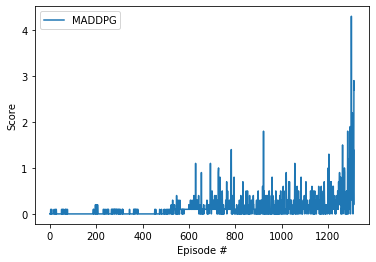

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [9]:
# Close the environment
env.close()